# Dimensionality Reduction

Given some high dimensional data, we can try to reduce its dimension.

This can help us to visualize the data and compress the data, which facilitates downstream tasks. To achieve good compression, we want to keep the most important information and discard the less important information, such as noise.

We will introduce the classic method for dimensionality reduction: Principal Component Analysis (PCA).

### Principal Component Analysis (PCA)

Suppose we have n data points in p-dimensional space: $\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n \in \mathbb{R}^p$, and we want to reduce the dimension to d (d < p). 

Our goal is to find a $d$-dimensional subspace such that the projection of the data points onto this subspace best approximates the original data points.

Mathematically, we are trying to approximate each $\mathbf{x}_k$ by

$$\mathbf{x}_k \approx \boldsymbol{\mu} + \sum_{j=1}^d (\beta_k)_j \mathbf{v}_j$$

where $\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_d \in \mathbb{R}^p$
is an orthonormal basis for the d-dimensional subspace, $\boldsymbol{\mu}$ represents the translation, and $(\beta_k)_j$ is the coefficient of the projection of $\mathbf{x}_k$ onto $\mathbf{v}_j$.

We can represent the subspace by $ V = [\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_d] \in \mathbb{R}^{p \times d}$, and the projection of $\mathbf{x}_k$ onto the subspace is $V \beta_k$, where $\beta_k \in \mathbb{R}^d$.

Then we can rewrite the approximation as

$$\mathbf{x}_k \approx \boldsymbol{\mu} + V \beta_k,$$

where $V^T V = I_{d \times d}$, because $\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_d$ are orthonormal.

### Optimization Problem

We arrive at the following optimization problem:

$$\min_{\substack{\boldsymbol{\mu}, \beta_1, \beta_2, ..., \beta_n,\\ V^T V = 1}} \sum_{k=1}^n ||\mathbf{x}_k - \boldsymbol{\mu} - V \beta_k||^2$$

We can partially optimize $\boldsymbol{\mu}$ and $\beta_k$ to obtain

$$\boldsymbol{\mu}^* = \bar{\mathbf{x}} = \frac{1}{n} \sum_{k=1}^n \mathbf{x}_k$$

$$\beta_k^* = V^T (\mathbf{x}_k - \boldsymbol{\mu})$$

Then we can rewrite the optimization problem as


$$\min_{V^T V = 1} \sum_{k=1}^n ||\mathbf{x}_k - \bar{x} - V V^T (\mathbf{x}_k - \bar{x})||^2$$


### How do we find the optimal subspace $V^*$?

Let X be the centered data matrix $X \in \mathbb{R}^{n \times p}$. That is, the i-th row of X is $\mathbf{x}_i - \bar{\mathbf{x}} \in \mathbb{R}^p$.

The following two characterizations of $V^*$ are equivalent:

#### 1. Singular Value Decomposition (SVD) 

Consider the **singular value decomposition (SVD)** of X:

$$X = U D V^T$$

where $U$ is an $n \times p$ orthogonal matrix, $D$ is a $p \times p$ diagonal matrix, with diagonal entries $d_1 \geq d_2 \geq ... \geq d_p \geq 0$, and $V$ is a $p \times p$ orthogonal matrix.

$V^*$ consists of the first $d$ columns of V.

#### 2. Eigendecomposition of the Covariance Matrix

The covariance matrix of X is $\Sigma = \frac{1}{n} X^T X$, which is a $p \times p$ symmetric matrix, and it has $p$ real eigenvalues $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_p \geq 0$ and $p$ orthonormal eigenvectors $v_1, v_2, ..., v_p$.

$V^*$ consists of the $d$ leading eigenvectors of the covariance matrix of X.

### How to interpret the principal component? 


The following two interpretations are equivalent:

1. The first principal component minimize the projection error. We lost the least information when we project the data points onto this direction.

2. The first principal component maximizes the variance of the projected data. We preserve the most information when we project the data points onto this direction.


"Information" is a vague concept. To be a bit more specific, consider a regression or classification task. If a feature is the same for all data points, it is not useful for prediction or classification. If a feature varies a lot, it is more likely to be useful.



## PCA on synthetic 2D data

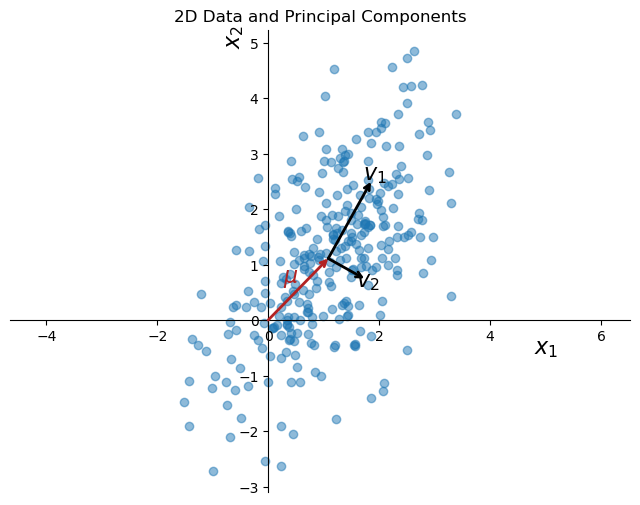

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
mean = [1, 1]
cov = [[1, 0.8], [0.8, 2]]  # diagonal covariance
x1, x2 = np.random.multivariate_normal(mean, cov, 300).T

data = np.column_stack((x1, x2))

# Apply PCA
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)

# Visualizing the data and the principal components
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)

k = 1
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    plt.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)

    plt.text(pca.mean_[0] + v[0]*1.1, pca.mean_[1] + v[1]*1.1, f'$v_{k}$', fontsize=16, ha='center',va = 'center')
    k += 1

# draw arrow from origin to the mean of the data, color red
plt.annotate('', pca.mean_, [0, 0], arrowprops=dict(arrowstyle='->', linewidth=2, color='firebrick', shrinkA=0, shrinkB=0))
plt.text(pca.mean_[0]*0.5, pca.mean_[1]*0.5, r'$\mu$', fontsize=16, ha='right', va='bottom', color='firebrick')

plt.title('2D Data and Principal Components')

# Customize axes to only show the left and bottom spines
ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)   # Hide the top spine
ax.spines['right'].set_visible(False) # Hide the right spine

# Ensure the x-axis and y-axis are shown
ax.spines['bottom'].set_position('zero')  # Position the bottom spine at y=0
ax.spines['left'].set_position('zero')    # Position the left spine at x=0

# add text
plt.text(5, -0.6, r'$x_1$', fontsize=16, ha='center')
plt.text(-0.6, 5, r'$x_2$', fontsize=16, ha='center', rotation=90) 

plt.axis('equal')
plt.show()


more [visualization](https://setosa.io/ev/principal-component-analysis/)

## PCA on hand written digits

Images are high dimensional data. We can use PCA to reduce the dimension of the images.

We will use the hand written digits dataset from sklearn. Each image is 8x8 pixels, so the dimension of each image is 64. We can treat each image as a data point in 64-dimensional space.

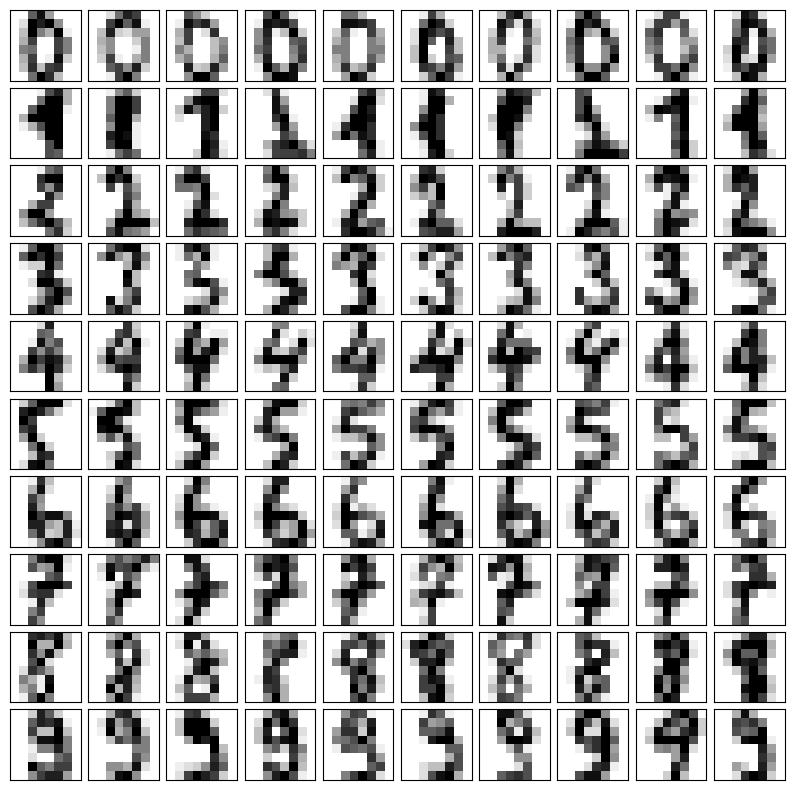

In [30]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X, y = load_digits(return_X_y=True)

# Prepare a figure to display the images
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Display several examples for each digit
for i in range(10):
    # Find indices of rows where the target is i
    indices = np.where(y == i)[0]
    # Select random indices to display
    random_indices = np.random.choice(indices, 10, replace=False)
    for j in range(10):
        ax = axes[i, j]
        # Display image
        image = X[random_indices[j]].reshape(8, 8)  # Reshape the flat array to 8x8
        ax.imshow(image, cmap='binary')

plt.show()


If we plot the data point in the subspace spanned by the first two principal components, we can see that there are some separations between the different digits.

In [31]:
import seaborn as sns
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)


In [32]:
X_pca.shape

(1797, 10)

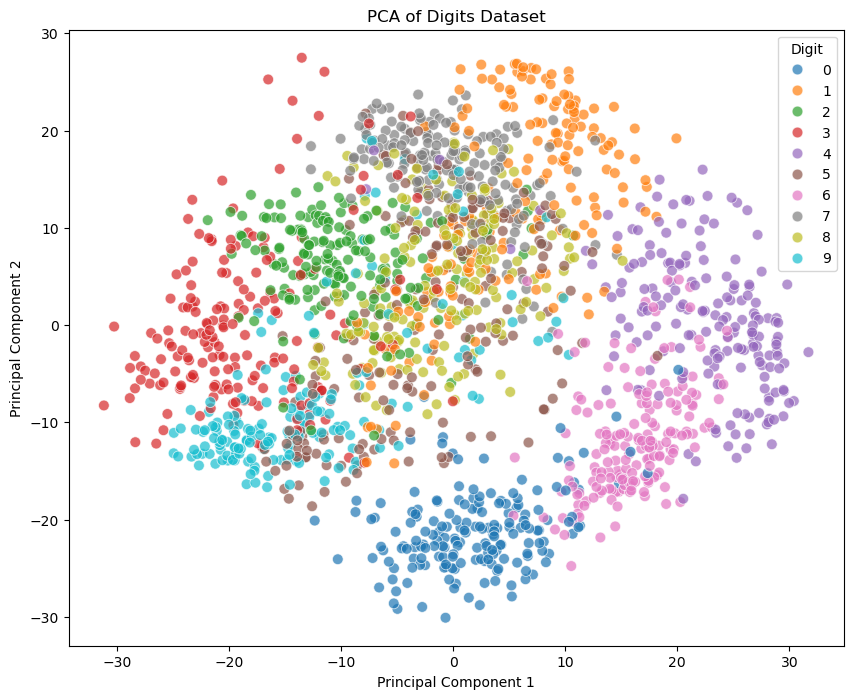

In [33]:

# Plotting the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, legend='full', s=60, alpha=0.7, palette='tab10')
plt.title('PCA of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.show()


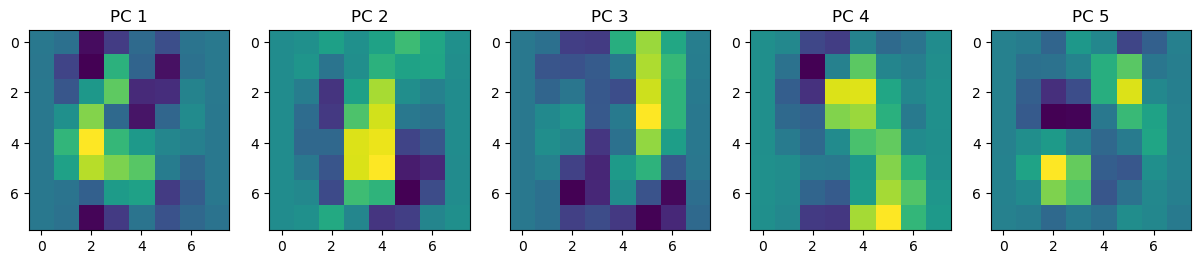

In [34]:

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    img = ax.imshow(pca.components_[i].reshape(8, 8))
    ax.set_title(f'PC {i+1}')

plt.show()


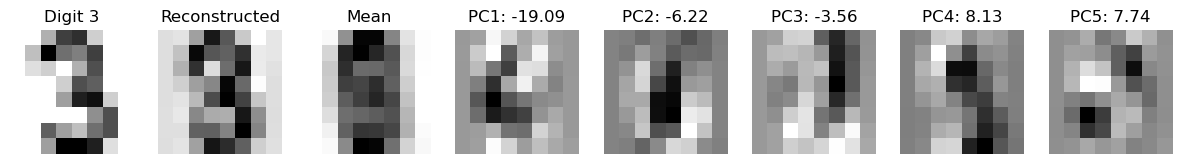

In [35]:
from sklearn.decomposition import PCA

num_components = 5
digit = 3

# Prepare a plot with 10 rows (digits 0-9) and columns for original, reconstruction, and principal components
ncol = num_components + 3
fig, axes = plt.subplots(1, ncol, figsize=(15, 3))


# Select a random example of the current digit
indices = np.where(y == digit)[0]
random_index = np.random.choice(indices)
original_image = X[random_index]

# Reconstruct the image using the top k principal components
mean_image = pca.mean_.reshape(-1)  # Mean of the original data
pca_components = pca.components_  # Principal components

reconstructed_image = mean_image.copy()
for i in range(pca.n_components_):
    beta = np.dot(original_image, pca_components[i])  # Coefficient for the i-th principal component
    reconstructed_image += beta * pca_components[i]

# Display the original image
axes[0].imshow(original_image.reshape(8, 8), cmap='binary')
axes[0].set_title(f"Digit {digit}")
axes[0].axis('off')

# Display the reconstructed image
axes[1].imshow(reconstructed_image.reshape(8, 8), cmap='binary')
axes[1].set_title("Reconstructed")
axes[1].axis('off')

# Display the mean image
axes[2].imshow(mean_image.reshape(8, 8), cmap='binary')
axes[2].set_title("Mean")
axes[2].axis('off')

# Display the k-th principal components
for k in range(num_components):
    pc_image = pca_components[k].reshape(8, 8)
    beta = np.dot(original_image, pca_components[k])  # Coefficient for the k-th principal component
    axes[3 + k].imshow(pc_image, cmap='binary')
    axes[3 + k].set_title(f"PC{k+1}: {beta:.2f}")
    axes[3 + k].axis('off')

plt.show()


We can also project the data points to random 2D subspaces.
That is, let $v_1, v_2$ be $\mathbb{R}^p$ be two random vectors, where the entries are drawn from a standard normal distribution. 
Let $V = [v_1, v_2]$. 
The projection of the data points onto the subspace spanned by $v_1, v_2$ is $X V$.

We can see that the data points are not well separated in this case.


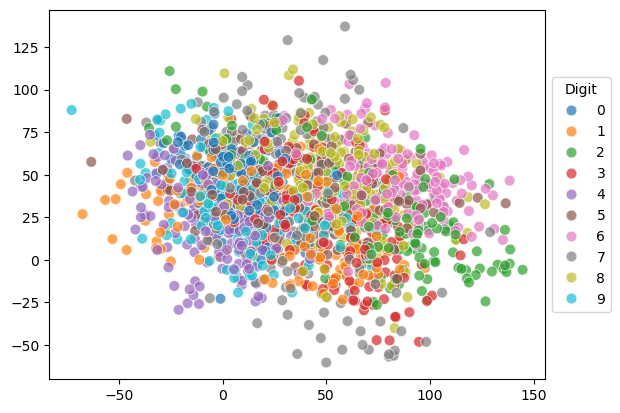

In [36]:
# do random linear projection

# Generate a random 2D projection
np.random.seed(0)
random_2d_projection = np.random.normal(size=(X.shape[1], 2))

# Project the data
X_projected = X.dot(random_2d_projection)

sns.scatterplot(x=X_projected[:, 0], y=X_projected[:, 1], hue=y, legend='full', s=60, alpha=0.7, palette='tab10')

# move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Digit')


## Application of PCA

Sometimes running an algorithm (regression, classification, clustering etc.) might be too computationally expensive due to the high dimensionality of the data. In such cases, we can use PCA to reduce the dimensionality of the data, and then run the algorithm on the reduced data.

In the following example, we will use logistic regression to classify the hand written digits using the $k$ leading principal components.

We can see that using only the first 10 principal components, we can achieve a classification accuracy of around 90%. 
With the first 20 principal components, we can achieve a classification accuracy of 98%.

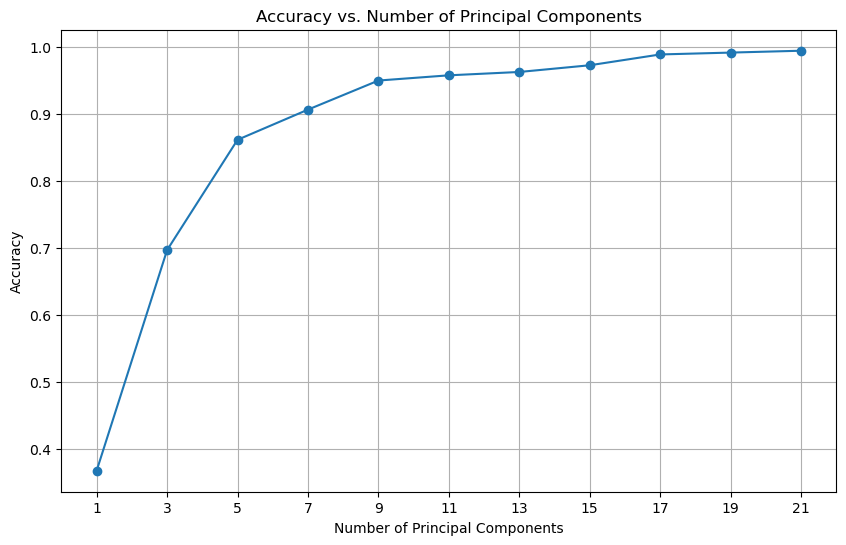

In [37]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# List to store accuracies
accuracies = []

# Maximum number of components to consider
max_components = 21  # As there are 64 features in the dataset


list_of_comp = np.arange(1, max_components + 1, 2)
# Loop over possible number of principal components
for n_components in list_of_comp:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Create a logistic regression model
    model = LogisticRegression(max_iter=1000)
    
    model.fit(X_pca, y)

    accuracies.append(model.score(X_pca, y))

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.plot(list_of_comp, accuracies, marker='o')
# set xticks to be the list of components
plt.xticks(list_of_comp)
plt.title('Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## Example of Nonlinear Dimensionality Reduction

PCA is a linear method, and it may not work well for nonlinear data. One popular nonlinear method is t-distributed stochastic neighbor embedding (t-SNE).

Intuitively, let $x_i$ be a data point in high dimensional space, and $y_i$ be the corresponding low dimensional representation. We want to adjust the location of $y_i$ such that similar points (in terms of their high dimensional counterparts) are close to each other in the low dimensional space.

In [38]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)


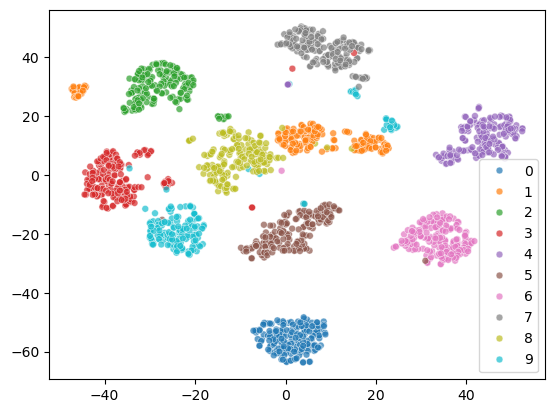

In [39]:
sc = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, legend='full', s=24, alpha=0.7, palette='tab10')

The 2D representation separates all the digits well. But some samples of the same digit are far apart, which is not ideal. Let's see what happens to the two cluster of digit 1.

From the visualization, we can see that there are two styles of digit 1.

Text(0.5, 1.0, 'Digit 1 with Max X1')

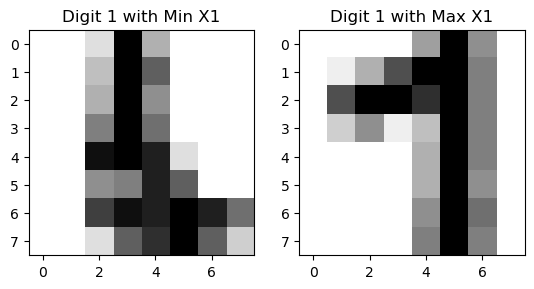

In [40]:
 
digit = 1
indices_of_digit = np.where(y == digit)[0]  # Get all indices where the digit is 3
X_tsne_digit = X_tsne[indices_of_digit]  # Filter t-SNE results for 3s

# Find the index of the minimum X1 value among all '1' digits
min_index = np.argmin(X_tsne_digit[:, 0])
actual_min_index = indices_of_digit[min_index]  # Get the actual index in the original dataset

max_index = np.argmax(X_tsne_digit[:, 0])
actual_max_index = indices_of_digit[max_index]

# Extract the corresponding image
image_of_digit_min = X[actual_min_index].reshape(8, 8)  # Reshape the flat vector back to 8x8
image_of_digit_max = X[actual_max_index].reshape(8, 8)



# Visualize the image
fig, axes = plt.subplots(1, 2)

axes[0].imshow(image_of_digit_min, cmap='binary')
axes[0].set_title('Digit 1 with Min X1')

axes[1].imshow(image_of_digit_max, cmap='binary')
axes[1].set_title('Digit 1 with Max X1')

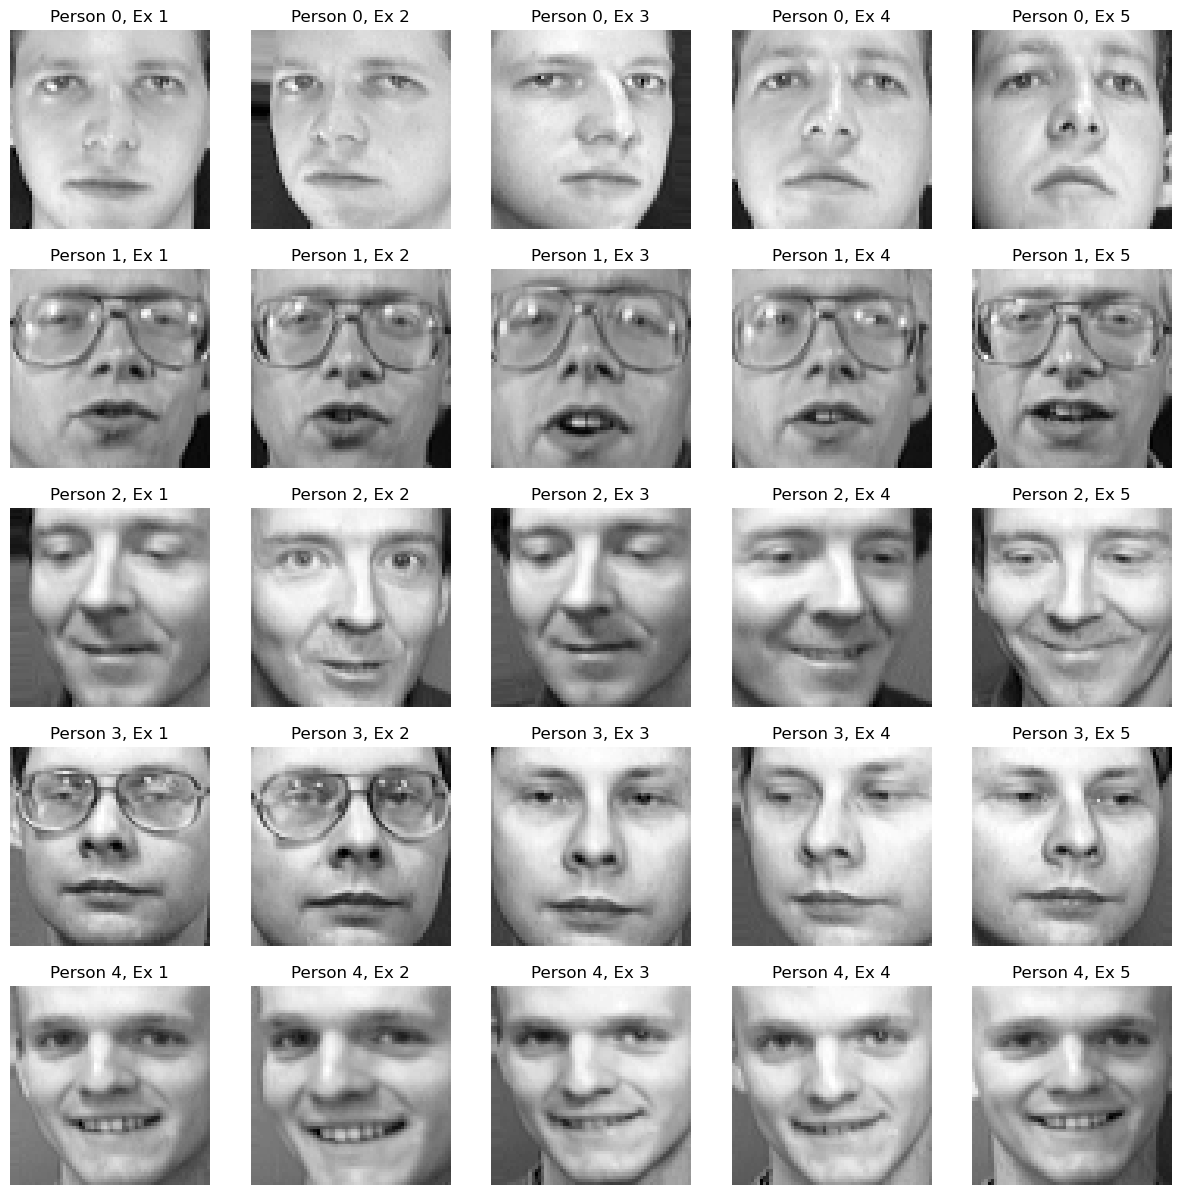

In [41]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X, y = fetch_olivetti_faces(return_X_y=True)


# Prepare a plot to show examples of the data for each person
n_persons = 5

fig, axes = plt.subplots(n_persons, 5, figsize=(n_persons*3, 15), subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Display examples for each person (0-9)
for person_id in range(n_persons):
    # Find indices of images for the current person
    indices = np.where(y == person_id)[0]
    # Select 5 random examples for the current person
    random_indices = np.random.choice(indices, 5, replace=False)
    for i in range(5):
        example_image = X[random_indices[i]].reshape(64, 64)
        axes[person_id, i].imshow(example_image, cmap='gray')
        axes[person_id, i].set_title(f"Person {person_id}, Ex {i+1}")
        axes[person_id, i].axis('off')

plt.show()


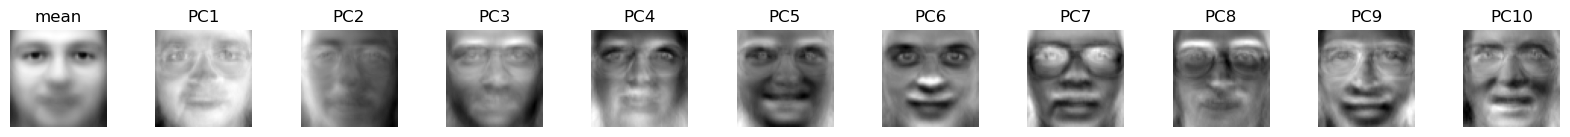

In [42]:
# Fit PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Prepare a plot to visualize the top 10 principal components
fig, axes = plt.subplots(1, 11, figsize=(20, 4), subplot_kw={'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the top 10 principal components
axes[0].imshow(pca.mean_.reshape(64, 64), cmap='gray')
axes[0].set_title(f"mean")
axes[0].axis('off')

for k in range(10):
    pc_image = pca.components_[k].reshape(64, 64)
    axes[k+1].imshow(pc_image, cmap='gray')
    axes[k+1].set_title(f"PC{k+1}")
    axes[k+1].axis('off')

plt.show()


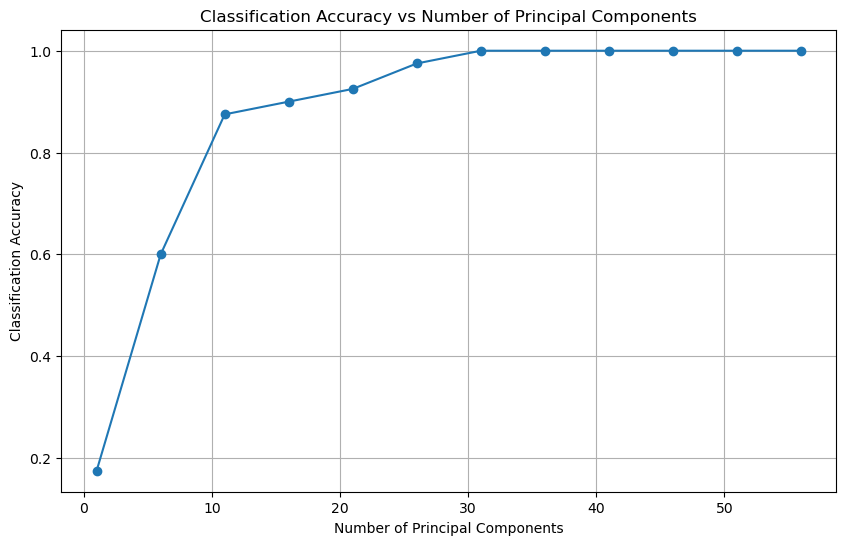

In [43]:
# import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Classification accuracy as a function of number of principal components
n_components_list = np.arange(1, 60, 5)
accuracies = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

for n_components in n_components_list:
    # Fit PCA with n_components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train a logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test_pca)
    accuracy = clf.score(X_test_pca, y_test)
    accuracies.append(accuracy)

# Plot the accuracy as a function of number of principal components
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, accuracies, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs Number of Principal Components')
plt.grid(True)
plt.show()